In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [45]:
# Load movie data
df_movies = pd.read_csv('movie_metadata.csv')

print(f"Rows: {df_movies.shape[0]}, Columns: {df_movies.shape[1]}")
df_movies.head()

Rows: 5043, Columns: 28


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [46]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [47]:
df_movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [48]:
# Load World Bank data
df_wb_raw = pd.read_csv('world_bank_data.csv')

print(f"Rows: {df_wb_raw.shape[0]}, Columns: {df_wb_raw.shape[1]}")
df_wb_raw.head()

Rows: 1069, Columns: 39


,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,1.45131466066431,2.26031420279821,2.6470032027451,1.18922812944517,3.91160341625552,-2.35110067203466,-20.7388393676343,-6.24017199240269,2.26694373649188,..
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,..,...,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,..,8.07,8.011,7.888,7.822,7.817,...,9.052,10.133,11.184,11.196,11.185,11.71,11.994,14.1,13.991,13.295
3,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,-0.661709164713771,4.38389195513915,4.97595150553836,0.626149149168802,2.30237251516839,5.60188791482222,5.1332034082496,13.7121023720065,-4.64470870797776,-6.60118564073727
4,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-9.57564016993408,-28.0021416538074,-7.18711090964234,9.55941167111243,8.30286659699082,13.3223333268813,...,2.2277040745779,3.90893551362245,3.28317593330073,3.67141928098908,2.06257790176122,-3.31375636888916,8.96957619074095,4.82669611912765,3.93661689192599,3.96171911223713


In [49]:
# Check missing values
missing = df_movies.isnull().sum()
missing_pct = (missing / len(df_movies) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct})
missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage (%)', ascending=False)

,Missing Count,Percentage (%)
gross,884,17.53
budget,492,9.76
aspect_ratio,329,6.52
content_rating,303,6.01
plot_keywords,153,3.03
title_year,108,2.14
director_name,104,2.06
director_facebook_likes,104,2.06
num_critic_for_reviews,50,0.99
actor_3_name,23,0.46


In [50]:
# Select relevant columns
movie_cols = ['movie_title', 'title_year', 'country', 'budget', 'gross',
              'genres', 'director_name', 'actor_1_name', 'imdb_score']

df_movies_clean = df_movies[movie_cols].copy()

# Drop rows with missing budget, gross, year, or country
df_movies_clean = df_movies_clean.dropna(subset=['budget', 'gross', 'title_year', 'country'])

# Remove rows where budget or gross is 0
df_movies_clean = df_movies_clean[(df_movies_clean['budget'] > 0) & (df_movies_clean['gross'] > 0)]

# Convert year to integer
df_movies_clean['title_year'] = df_movies_clean['title_year'].astype(int)

print(f"Cleaned movie data: {df_movies_clean.shape[0]} rows")

Cleaned movie data: 3891 rows


In [51]:
# Calculate ROI and profit
df_movies_clean['roi'] = (df_movies_clean['gross'] - df_movies_clean['budget']) / df_movies_clean['budget']
df_movies_clean['profit'] = df_movies_clean['gross'] - df_movies_clean['budget']
df_movies_clean['is_profitable'] = df_movies_clean['profit'] > 0

df_movies_clean.head()

,movie_title,title_year,country,budget,gross,genres,director_name,actor_1_name,imdb_score,roi,profit,is_profitable
0,Avatar,2009,USA,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,7.9,2.208885,523505847.0,True
1,Pirates of the Caribbean: At World's End,2007,USA,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,7.1,0.031347,9404152.0,True
2,Spectre,2015,UK,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,6.8,-0.183371,-44925825.0,False
3,The Dark Knight Rises,2012,USA,250000000.0,448130642.0,Action|Thriller,Christopher Nolan,Tom Hardy,8.5,0.792523,198130642.0,True
5,John Carter,2012,USA,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,6.6,-0.722948,-190641321.0,False


In [52]:
# Create budget categories
def budget_category(budget):
    if budget < 10_000_000:
        return 'Low'
    elif budget < 50_000_000:
        return 'Medium'
    else:
        return 'High'

df_movies_clean['budget_category'] = df_movies_clean['budget'].apply(budget_category)

print("Budget Category Distribution:")
print(df_movies_clean['budget_category'].value_counts())

Budget Category Distribution:
budget_category
Medium    1890
High      1036
Low        965
Name: count, dtype: int64


In [53]:
# Extract main genre
df_movies_clean['main_genre'] = df_movies_clean['genres'].apply(lambda x: x.split('|')[0] if pd.notna(x) else 'Unknown')

# Define escapist genres
escapist_genres = ['Comedy', 'Animation', 'Fantasy', 'Family', 'Adventure', 'Musical']
df_movies_clean['is_escapist'] = df_movies_clean['main_genre'].isin(escapist_genres)

print("Genre Distribution (Top 10):")
print(df_movies_clean['main_genre'].value_counts().head(10))

Genre Distribution (Top 10):
main_genre
Comedy         1036
Action          970
Drama           702
Adventure       378
Crime           260
Biography       208
Horror          165
Animation        46
Documentary      43
Fantasy          37
Name: count, dtype: int64


In [54]:
# Country distribution
print("Country Distribution (Top 10):")
print(df_movies_clean['country'].value_counts().head(10))

Country Distribution (Top 10):
country
USA          3074
UK            325
France        106
Germany        82
Canada         64
Australia      41
Spain          22
Japan          17
China          15
India          14
Name: count, dtype: int64


In [55]:
# Transform World Bank data from wide to long format
year_cols = [col for col in df_wb_raw.columns if 'YR' in col]
id_cols = ['Country Name', 'Country Code', 'Series Name', 'Series Code']

df_wb_long = df_wb_raw.melt(
    id_vars=id_cols,
    value_vars=year_cols,
    var_name='Year_Raw',
    value_name='Value'
)

# Extract year from "1990 [YR1990]" format
df_wb_long['Year'] = df_wb_long['Year_Raw'].str.extract(r'(\d{4})').astype(int)

# Convert '..' to NaN
df_wb_long['Value'] = pd.to_numeric(df_wb_long['Value'], errors='coerce')

df_wb_long.head()

,Country Name,Country Code,Series Name,Series Code,Year_Raw,Value,Year
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1990 [YR1990],NaN,1990
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1990 [YR1990],NaN,1990
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1990 [YR1990],NaN,1990
3,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1990 [YR1990],NaN,1990
4,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1990 [YR1990],-9.57564,1990


In [56]:
# Map series names to shorter names
series_mapping = {
    'GDP growth (annual %)': 'gdp_growth',
    'GDP per capita (current US$)': 'gdp_per_capita',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'unemployment',
    'Inflation, consumer prices (annual %)': 'inflation'
}

df_wb_long['Indicator'] = df_wb_long['Series Name'].map(series_mapping)

# Pivot to get each indicator as a column
df_economic = df_wb_long.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Indicator',
    values='Value'
).reset_index()

df_economic.columns.name = None

print(f"Economic data: {df_economic.shape[0]} rows")
df_economic.head()

Economic data: 9049 rows


,Country Name,Country Code,Year,gdp_growth,gdp_per_capita,inflation,unemployment
0,Afghanistan,AFG,1991,NaN,NaN,NaN,8.070
1,Afghanistan,AFG,1992,NaN,NaN,NaN,8.011
2,Afghanistan,AFG,1993,NaN,NaN,NaN,7.888
3,Afghanistan,AFG,1994,NaN,NaN,NaN,7.822
4,Afghanistan,AFG,1995,NaN,NaN,NaN,7.817


In [57]:
# Define economic periods
def economic_period(year):
    if year in [2008, 2009]:
        return 'Crisis_2008'
    elif year == 2020:
        return 'Crisis_COVID'
    else:
        return 'Normal'

df_economic['economic_period'] = df_economic['Year'].apply(economic_period)

# Define GDP status
def gdp_status(gdp_growth):
    if pd.isna(gdp_growth):
        return 'Unknown'
    elif gdp_growth < 0:
        return 'Recession'
    elif gdp_growth < 2:
        return 'Slow_Growth'
    else:
        return 'Growth'

df_economic['gdp_status'] = df_economic['gdp_growth'].apply(gdp_status)

print("Economic Period Distribution:")
print(df_economic['economic_period'].value_counts())

Economic Period Distribution:
economic_period
Normal          8263
Crisis_2008      523
Crisis_COVID     263
Name: count, dtype: int64


In [58]:
# Country name mapping
country_mapping = {
    'USA': 'United States',
    'UK': 'United Kingdom',
    'South Korea': 'Korea, Rep.',
    'Hong Kong': 'Hong Kong SAR, China',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Rep.',
    'Czech Republic': 'Czechia',
    'West Germany': 'Germany'
}

df_movies_clean['country_mapped'] = df_movies_clean['country'].replace(country_mapping)

# Merge datasets
df_merged = pd.merge(
    df_movies_clean,
    df_economic,
    left_on=['country_mapped', 'title_year'],
    right_on=['Country Name', 'Year'],
    how='left'
)

print(f"Merged data: {df_merged.shape[0]} rows")
print(f"Movies with economic data: {df_merged['gdp_growth'].notna().sum()}")

Merged data: 3891 rows
Movies with economic data: 3574


In [59]:
df_merged.head()

,movie_title,title_year,country,budget,gross,genres,director_name,actor_1_name,imdb_score,roi,...,country_mapped,Country Name,Country Code,Year,gdp_growth,gdp_per_capita,inflation,unemployment,economic_period,gdp_status
0,Avatar,2009,USA,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,7.9,2.208885,...,United States,United States,USA,2009.0,-2.576500,47194.950089,-0.355546,9.254,Crisis_2008,Recession
1,Pirates of the Caribbean: At World's End,2007,USA,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,7.1,0.031347,...,United States,United States,USA,2007.0,2.003858,48050.227412,2.852672,4.622,Normal,Growth
2,Spectre,2015,UK,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,6.8,-0.183371,...,United Kingdom,United Kingdom,GBR,2015.0,2.222888,44983.885523,0.368047,5.517,Normal,Growth
3,The Dark Knight Rises,2012,USA,250000000.0,448130642.0,Action|Thriller,Christopher Nolan,Tom Hardy,8.5,0.792523,...,United States,United States,USA,2012.0,2.289113,51708.394061,2.069337,8.069,Normal,Growth
4,John Carter,2012,USA,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,6.6,-0.722948,...,United States,United States,USA,2012.0,2.289113,51708.394061,2.069337,8.069,Normal,Growth


##  Exploratory Data Analysis (EDA)

In [60]:

print("MOVIE DATA SUMMARY STATISTICS")

print(f"Total movies: {len(df_movies_clean)}")
print(f"Year range: {df_movies_clean['title_year'].min()} - {df_movies_clean['title_year'].max()}")
print(f"Average budget: ${df_movies_clean['budget'].mean():,.0f}")
print(f"Average gross: ${df_movies_clean['gross'].mean():,.0f}")
print(f"Average ROI: {df_movies_clean['roi'].mean():.2f}")
print(f"Profitable movie ratio: {df_movies_clean['is_profitable'].mean()*100:.1f}%")

MOVIE DATA SUMMARY STATISTICS
Total movies: 3891
Year range: 1920 - 2016
Average budget: $45,210,278
Average gross: $51,054,995
Average ROI: 5.25
Profitable movie ratio: 52.7%


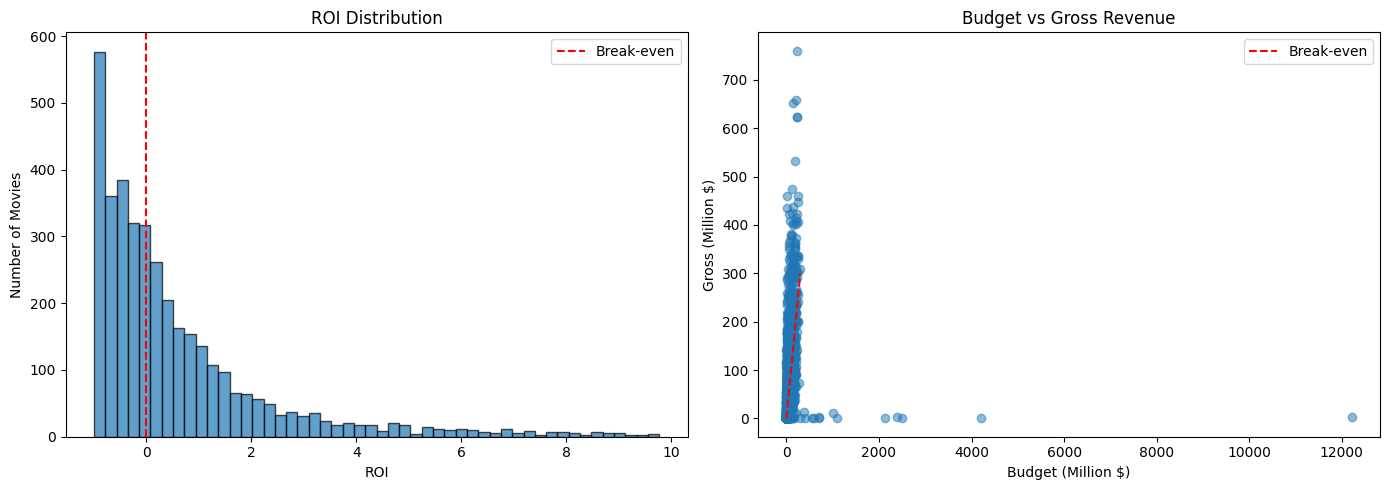

In [61]:
# ROI Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROI Histogram
roi_filtered = df_movies_clean[df_movies_clean['roi'].between(-1, 10)]['roi']
axes[0].hist(roi_filtered, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', label='Break-even')
axes[0].set_xlabel('ROI')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('ROI Distribution')
axes[0].legend()

# Budget vs Gross
axes[1].scatter(df_movies_clean['budget']/1e6, df_movies_clean['gross']/1e6, alpha=0.5)
axes[1].plot([0, 300], [0, 300], 'r--', label='Break-even')
axes[1].set_xlabel('Budget (Million $)')
axes[1].set_ylabel('Gross (Million $)')
axes[1].set_title('Budget vs Gross Revenue')
axes[1].legend()

plt.tight_layout()
plt.show()

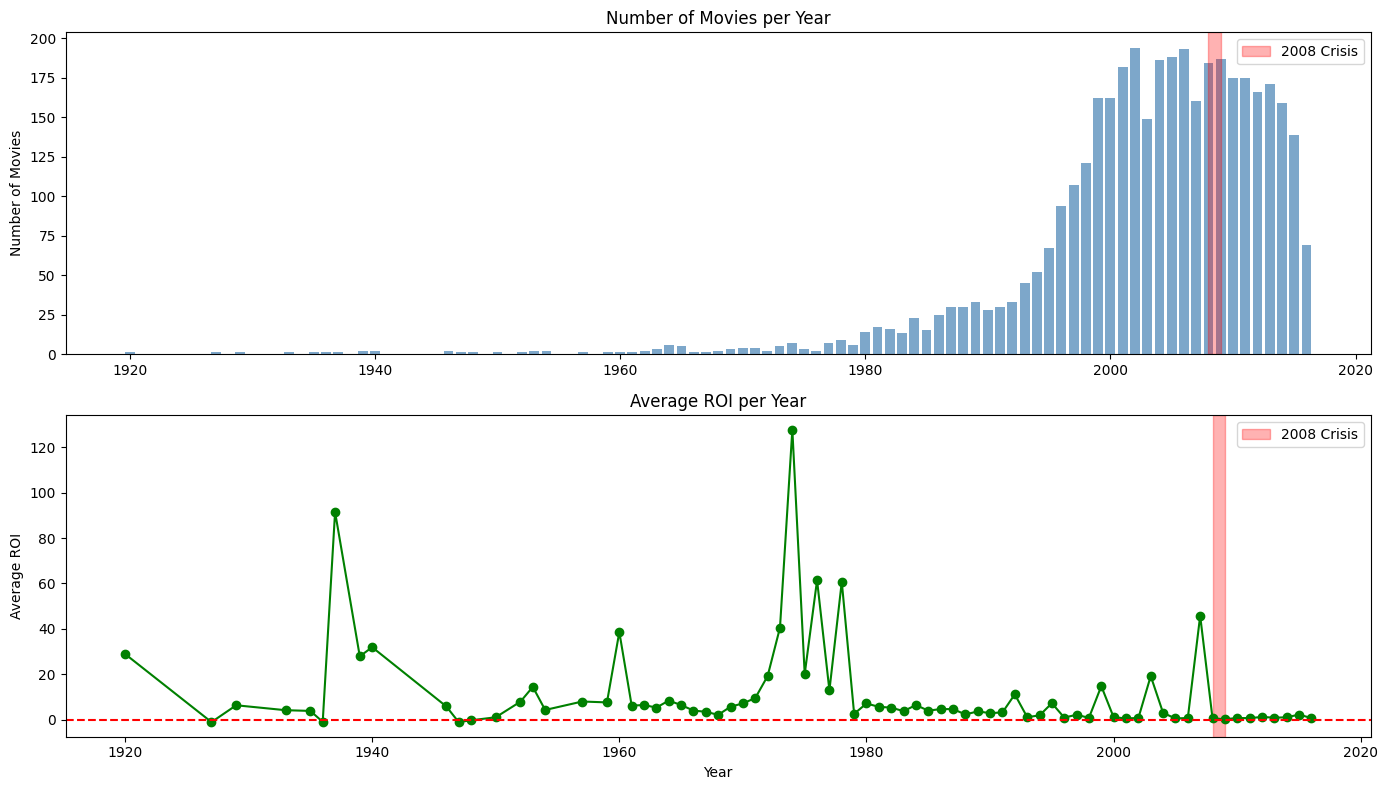

In [62]:
# Yearly trends
yearly_stats = df_movies_clean.groupby('title_year').agg({
    'movie_title': 'count',
    'roi': 'mean',
    'budget': 'mean',
    'gross': 'mean'
}).rename(columns={'movie_title': 'film_count'})

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Number of movies per year
axes[0].bar(yearly_stats.index, yearly_stats['film_count'], color='steelblue', alpha=0.7)
axes[0].axvspan(2008, 2009, alpha=0.3, color='red', label='2008 Crisis')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies per Year')
axes[0].legend()

# Average ROI per year
axes[1].plot(yearly_stats.index, yearly_stats['roi'], marker='o', color='green')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].axvspan(2008, 2009, alpha=0.3, color='red', label='2008 Crisis')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average ROI')
axes[1].set_title('Average ROI per Year')
axes[1].legend()

plt.tight_layout()
plt.show()

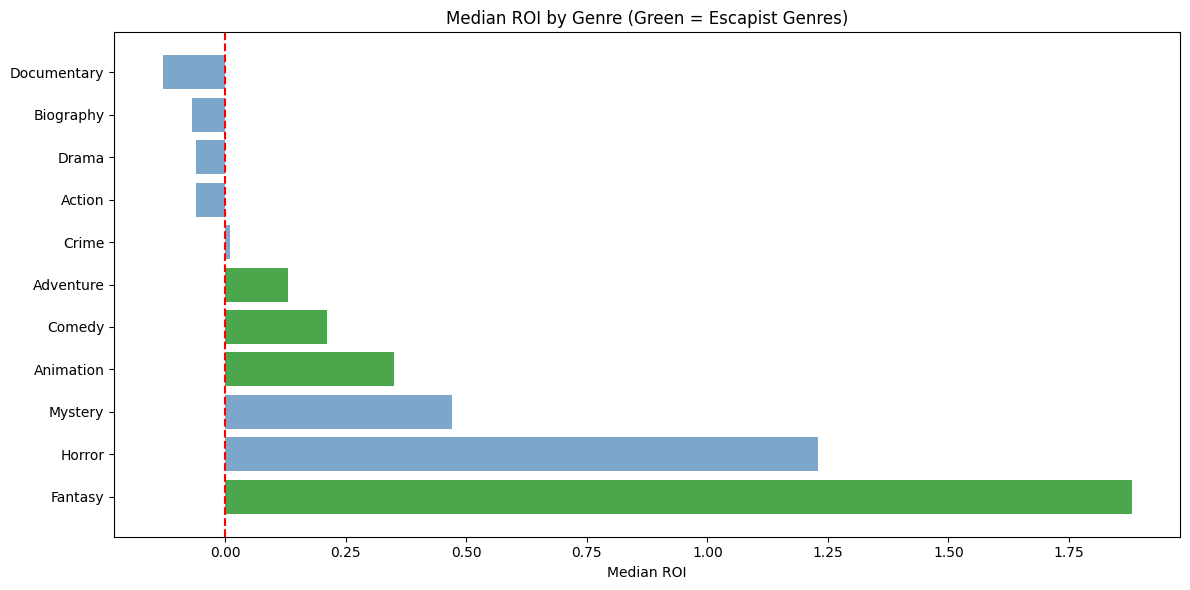

             mean_roi  median_roi  count
main_genre                              
Fantasy          4.93        1.88     37
Horror          70.43        1.23    165
Mystery          1.37        0.47     24
Animation        3.82        0.35     46
Comedy           2.43        0.21   1036
Adventure        1.18        0.13    378
Crime            0.99        0.01    260
Action           0.79       -0.06    970
Drama            1.77       -0.06    702
Biography       13.96       -0.07    208
Documentary      4.42       -0.13     43


In [63]:
# ROI by genre
genre_roi = df_movies_clean.groupby('main_genre').agg({
    'roi': ['mean', 'median', 'count']
}).round(2)
genre_roi.columns = ['mean_roi', 'median_roi', 'count']
genre_roi = genre_roi[genre_roi['count'] >= 20].sort_values('median_roi', ascending=False)

plt.figure(figsize=(12, 6))
colors = ['green' if g in escapist_genres else 'steelblue' for g in genre_roi.index]
plt.barh(genre_roi.index, genre_roi['median_roi'], color=colors, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Median ROI')
plt.title('Median ROI by Genre (Green = Escapist Genres)')
plt.tight_layout()
plt.show()

print(genre_roi)

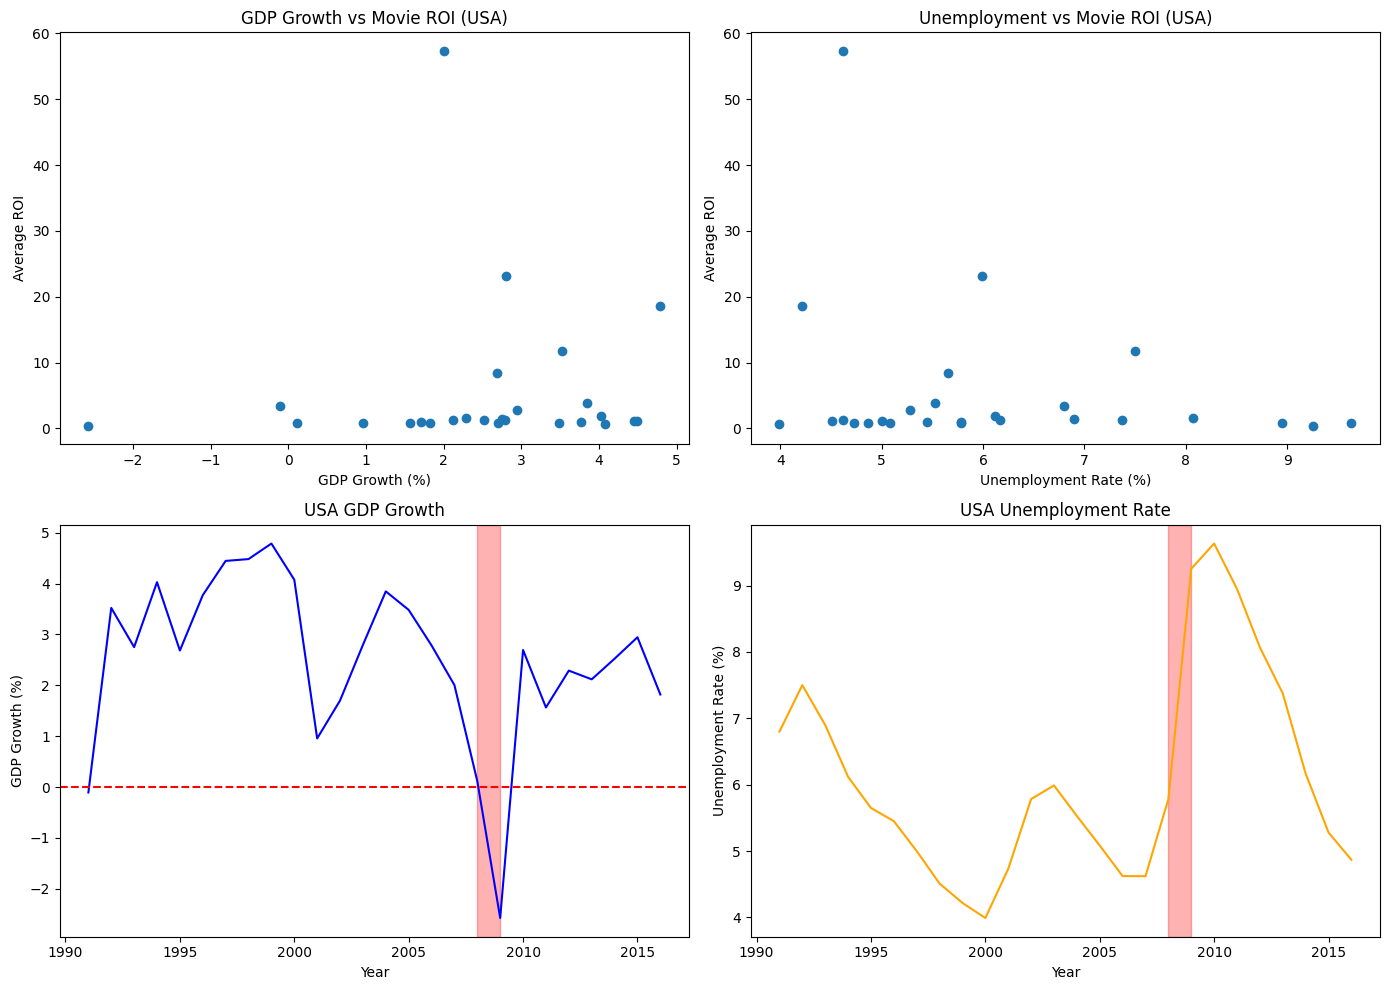

In [64]:
# USA economic data and movie performance
df_usa = df_merged[df_merged['country'] == 'USA'].copy()

usa_yearly = df_usa.groupby('title_year').agg({
    'roi': 'mean',
    'budget': 'mean',
    'gross': 'mean',
    'gdp_growth': 'first',
    'unemployment': 'first',
    'inflation': 'first'
}).dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GDP Growth vs ROI
axes[0, 0].scatter(usa_yearly['gdp_growth'], usa_yearly['roi'])
axes[0, 0].set_xlabel('GDP Growth (%)')
axes[0, 0].set_ylabel('Average ROI')
axes[0, 0].set_title('GDP Growth vs Movie ROI (USA)')

# Unemployment vs ROI
axes[0, 1].scatter(usa_yearly['unemployment'], usa_yearly['roi'])
axes[0, 1].set_xlabel('Unemployment Rate (%)')
axes[0, 1].set_ylabel('Average ROI')
axes[0, 1].set_title('Unemployment vs Movie ROI (USA)')

# GDP Growth over time
axes[1, 0].plot(usa_yearly.index, usa_yearly['gdp_growth'], 'b-')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].axvspan(2008, 2009, alpha=0.3, color='red')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('GDP Growth (%)')
axes[1, 0].set_title('USA GDP Growth')

# Unemployment over time
axes[1, 1].plot(usa_yearly.index, usa_yearly['unemployment'], 'orange')
axes[1, 1].axvspan(2008, 2009, alpha=0.3, color='red')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Unemployment Rate (%)')
axes[1, 1].set_title('USA Unemployment Rate')

plt.tight_layout()
plt.show()

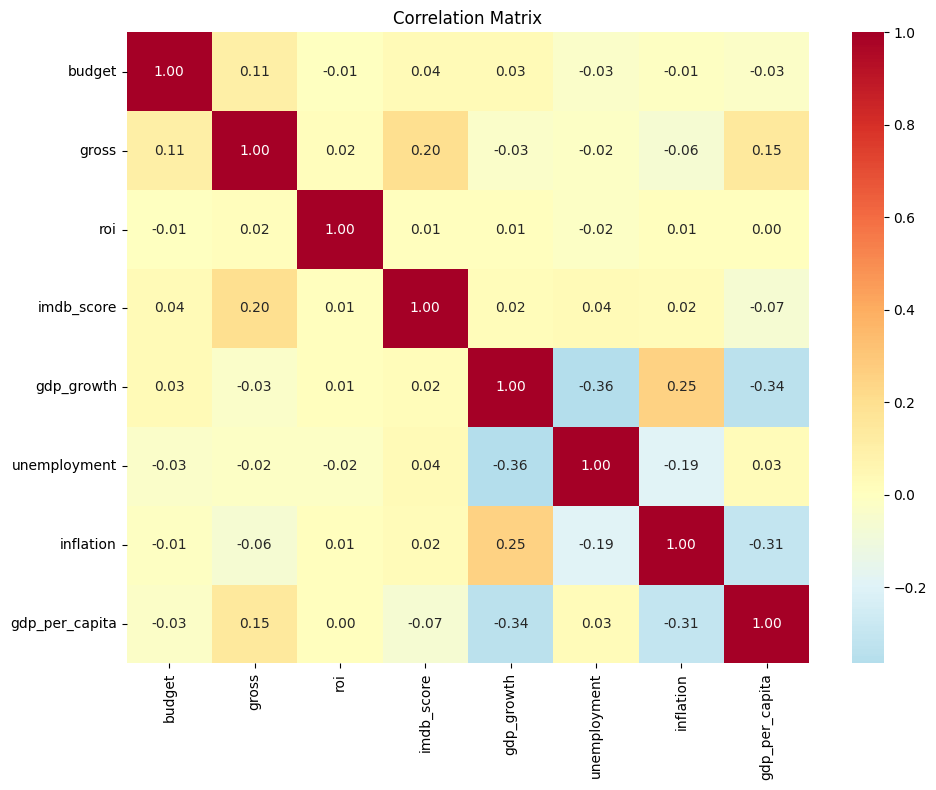

In [65]:
# Correlation matrix
correlation_cols = ['budget', 'gross', 'roi', 'imdb_score', 'gdp_growth', 'unemployment', 'inflation', 'gdp_per_capita']
corr_data = df_merged[correlation_cols].dropna()

corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

##  Hypothesis Testing

###  H1: Low-budget films have higher ROI during economic recession

**Null Hypothesis (H0):** There is no difference in ROI for low-budget films between recession and normal periods.

**Alternative Hypothesis (H1):** Low-budget films have higher ROI during recession periods.

In [66]:
# Define recession years
df_merged['is_recession'] = (df_merged['gdp_growth'] < 0) | (df_merged['title_year'].isin([2008, 2009]))

# Get ROI for low-budget films
low_budget = df_merged[df_merged['budget_category'] == 'Low']

roi_recession = low_budget[low_budget['is_recession'] == True]['roi'].dropna()
roi_normal = low_budget[low_budget['is_recession'] == False]['roi'].dropna()

print("H1: Low-budget films have higher ROI during economic recession")

print(f"Recession period - Low budget film count: {len(roi_recession)}")
print(f"Normal period - Low budget film count: {len(roi_normal)}")
print(f"\nRecession period mean ROI: {roi_recession.mean():.2f}")
print(f"Normal period mean ROI: {roi_normal.mean():.2f}")

H1: Low-budget films have higher ROI during economic recession
Recession period - Low budget film count: 92
Normal period - Low budget film count: 873

Recession period mean ROI: 1.83
Normal period mean ROI: 21.48


In [67]:
# Mann-Whitney U test (non-parametric)
stat, p_value = stats.mannwhitneyu(roi_recession, roi_normal, alternative='greater')

print(f"Mann-Whitney U Test:")
print(f"Test statistic: {stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nWe reject the null hypothesis. Low-budget films have significantly higher ROI during recession.")
else:
    print("\nWe fail to reject the null hypothesis. No significant difference found.")

Mann-Whitney U Test:
Test statistic: 29904.00
P-value: 1.0000

We fail to reject the null hypothesis. No significant difference found.


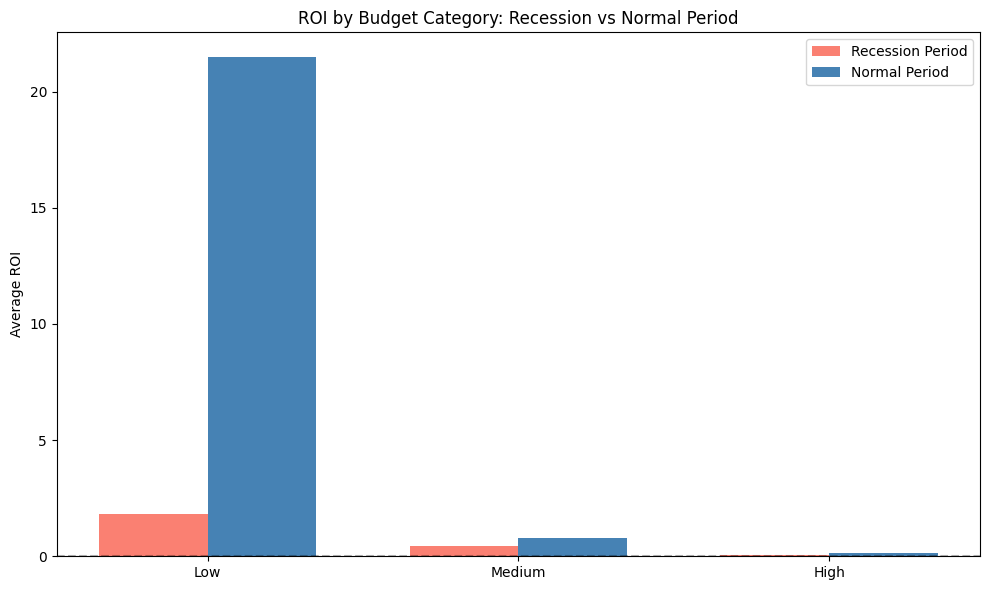

In [68]:
# Visualization for H1
fig, ax = plt.subplots(figsize=(10, 6))

budget_cats = ['Low', 'Medium', 'High']
recession_means = []
normal_means = []

for cat in budget_cats:
    cat_data = df_merged[df_merged['budget_category'] == cat]
    recession_means.append(cat_data[cat_data['is_recession'] == True]['roi'].mean())
    normal_means.append(cat_data[cat_data['is_recession'] == False]['roi'].mean())

x = np.arange(len(budget_cats))
width = 0.35

bars1 = ax.bar(x - width/2, recession_means, width, label='Recession Period', color='salmon')
bars2 = ax.bar(x + width/2, normal_means, width, label='Normal Period', color='steelblue')

ax.set_ylabel('Average ROI')
ax.set_title('ROI by Budget Category: Recession vs Normal Period')
ax.set_xticks(x)
ax.set_xticklabels(budget_cats)
ax.legend()
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

###  H2: Escapist genres are more successful during high unemployment periods

**Null Hypothesis (H0):** There is no difference in ROI between escapist and non-escapist genres during high unemployment.

**Alternative Hypothesis (H1):** Escapist genres have higher ROI during high unemployment periods.

In [69]:
# Define high unemployment (above median)
unemployment_median = df_merged['unemployment'].median()
df_merged['high_unemployment'] = df_merged['unemployment'] > unemployment_median

# Get ROI for escapist vs non-escapist during high unemployment
high_unemp = df_merged[df_merged['high_unemployment'] == True]

escapist_roi = high_unemp[high_unemp['is_escapist'] == True]['roi'].dropna()
non_escapist_roi = high_unemp[high_unemp['is_escapist'] == False]['roi'].dropna()

print("H2: Escapist genres are more successful during high unemployment")

print(f"During high unemployment:")
print(f"  Escapist film count: {len(escapist_roi)}")
print(f"  Non-escapist film count: {len(non_escapist_roi)}")
print(f"\n  Escapist mean ROI: {escapist_roi.mean():.2f}")
print(f"  Non-escapist mean ROI: {non_escapist_roi.mean():.2f}")

H2: Escapist genres are more successful during high unemployment
During high unemployment:
  Escapist film count: 656
  Non-escapist film count: 1053

  Escapist mean ROI: 1.16
  Non-escapist mean ROI: 3.78


In [70]:
# Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(escapist_roi, non_escapist_roi, alternative='greater')

print(f"Mann-Whitney U Test:")
print(f"Test statistic: {stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nWe reject the null hypothesis. Escapist genres are significantly more successful.")
else:
    print("\nWe fail to reject the null hypothesis. No significant difference found.")

Mann-Whitney U Test:
Test statistic: 367105.00
P-value: 0.0143

We reject the null hypothesis. Escapist genres are significantly more successful.


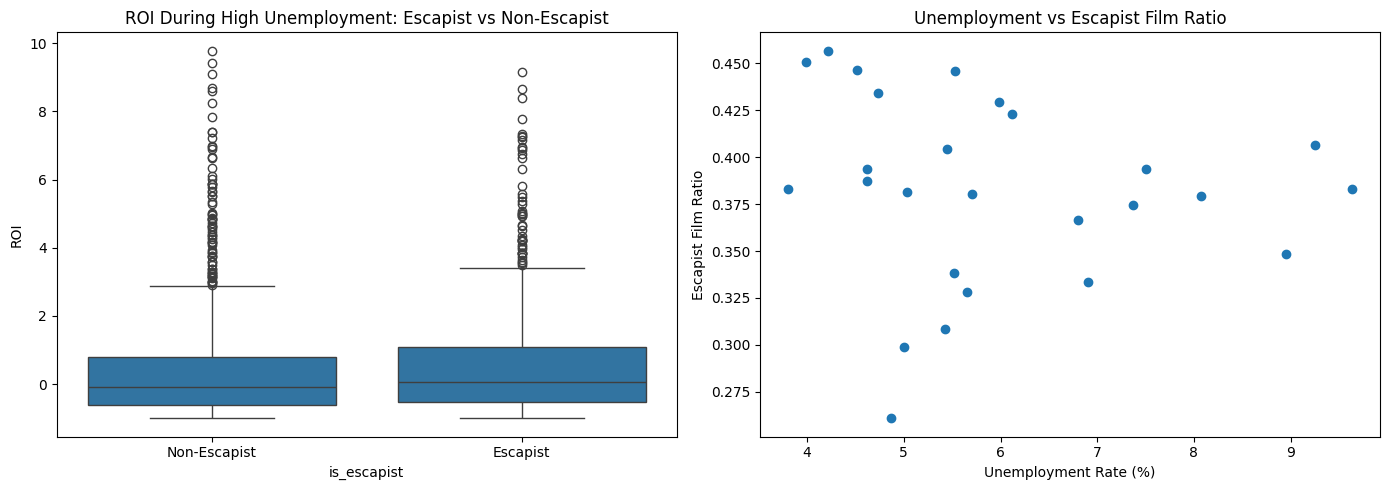

In [71]:
# Visualization for H2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
plot_data = df_merged[df_merged['high_unemployment'] == True][['is_escapist', 'roi']].dropna()
plot_data = plot_data[plot_data['roi'].between(-1, 10)]

sns.boxplot(data=plot_data, x='is_escapist', y='roi', ax=axes[0])
axes[0].set_xticklabels(['Non-Escapist', 'Escapist'])
axes[0].set_ylabel('ROI')
axes[0].set_title('ROI During High Unemployment: Escapist vs Non-Escapist')

# Escapist ratio by unemployment
yearly_escapist = df_merged.groupby('title_year').agg({
    'is_escapist': 'mean',
    'unemployment': 'first'
}).dropna()

axes[1].scatter(yearly_escapist['unemployment'], yearly_escapist['is_escapist'])
axes[1].set_xlabel('Unemployment Rate (%)')
axes[1].set_ylabel('Escapist Film Ratio')
axes[1].set_title('Unemployment vs Escapist Film Ratio')

plt.tight_layout()
plt.show()

###  H3: ROI distribution is different during the 2008 crisis

**Null Hypothesis (H0):** ROI distribution during 2008-2009 is the same as other years.

**Alternative Hypothesis (H1):** ROI distribution during 2008-2009 is significantly different.

In [72]:
# Compare 2008-2009 vs other years
crisis_years = [2008, 2009]
roi_crisis = df_movies_clean[df_movies_clean['title_year'].isin(crisis_years)]['roi'].dropna()
roi_other = df_movies_clean[~df_movies_clean['title_year'].isin(crisis_years)]['roi'].dropna()

print("H3: ROI distribution is different during the 2008 crisis")

print(f"2008-2009 film count: {len(roi_crisis)}")
print(f"Other years film count: {len(roi_other)}")
print(f"\n2008-2009 mean ROI: {roi_crisis.mean():.2f}")
print(f"2008-2009 median ROI: {roi_crisis.median():.2f}")
print(f"\nOther years mean ROI: {roi_other.mean():.2f}")
print(f"Other years median ROI: {roi_other.median():.2f}")

H3: ROI distribution is different during the 2008 crisis
2008-2009 film count: 371
Other years film count: 3520

2008-2009 mean ROI: 0.46
2008-2009 median ROI: -0.15

Other years mean ROI: 5.76
Other years median ROI: 0.10


In [73]:
# Independent t-test
t_stat, p_value_t = stats.ttest_ind(roi_crisis, roi_other)

print(f"Independent t-test:")
print(f"t-statistic: {t_stat:.2f}")
print(f"P-value: {p_value_t:.4f}")

# Mann-Whitney U test
u_stat, p_value_u = stats.mannwhitneyu(roi_crisis, roi_other)

print(f"\nMann-Whitney U Test:")
print(f"U-statistic: {u_stat:.2f}")
print(f"P-value: {p_value_u:.4f}")

if p_value_u < 0.05:
    print("\nWe reject the null hypothesis. ROI distributions are significantly different.")
else:
    print("\nWe fail to reject the null hypothesis. No significant difference found.")

Independent t-test:
t-statistic: -0.75
P-value: 0.4542

Mann-Whitney U Test:
U-statistic: 559734.00
P-value: 0.0000

We reject the null hypothesis. ROI distributions are significantly different.


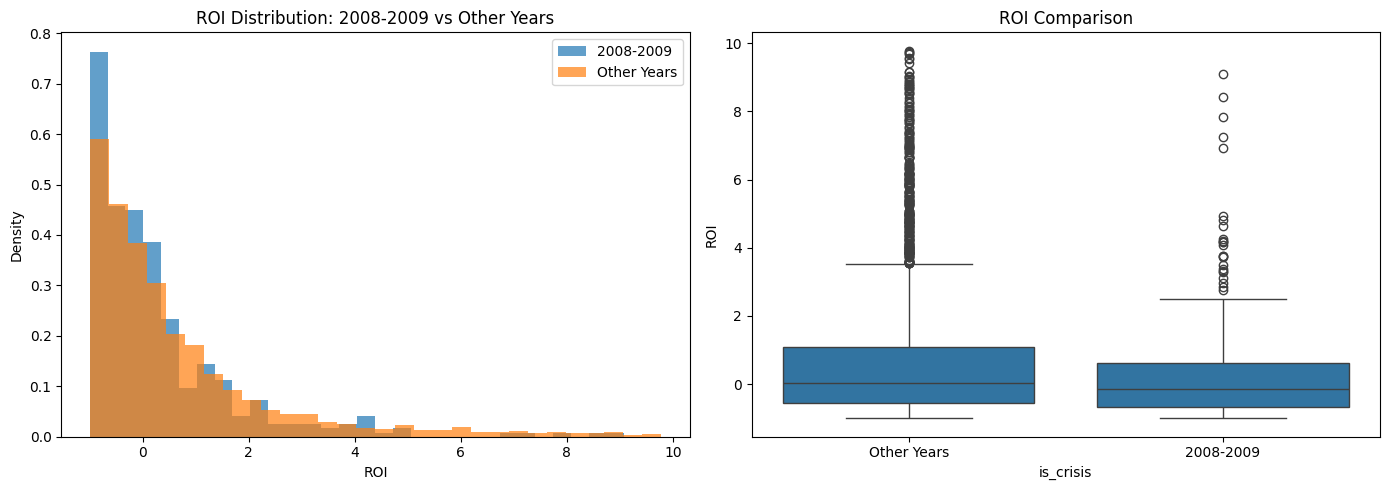

In [74]:
# Visualization for H3
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
axes[0].hist(roi_crisis[roi_crisis.between(-1, 10)], bins=30, alpha=0.7, label='2008-2009', density=True)
axes[0].hist(roi_other[roi_other.between(-1, 10)], bins=30, alpha=0.7, label='Other Years', density=True)
axes[0].set_xlabel('ROI')
axes[0].set_ylabel('Density')
axes[0].set_title('ROI Distribution: 2008-2009 vs Other Years')
axes[0].legend()

# Boxplot
df_movies_clean['is_crisis'] = df_movies_clean['title_year'].isin(crisis_years)
plot_data = df_movies_clean[df_movies_clean['roi'].between(-1, 10)]

sns.boxplot(data=plot_data, x='is_crisis', y='roi', ax=axes[1])
axes[1].set_xticklabels(['Other Years', '2008-2009'])
axes[1].set_ylabel('ROI')
axes[1].set_title('ROI Comparison')

plt.tight_layout()
plt.show()

###  H4: Positive correlation between country GDP and movie budget

**Null Hypothesis (H0):** There is no correlation between country GDP per capita and average movie budget.

**Alternative Hypothesis (H1):** There is a positive correlation between country GDP per capita and average movie budget.

In [75]:
# Calculate country-level statistics
country_stats = df_merged.groupby('country').agg({
    'budget': 'mean',
    'gdp_per_capita': 'mean',
    'movie_title': 'count'
}).rename(columns={'movie_title': 'film_count'})

# Keep countries with at least 5 films
country_stats = country_stats[country_stats['film_count'] >= 5].dropna()

print("H4: Positive correlation between country GDP and movie budget")

print(f"Number of countries: {len(country_stats)}")

H4: Positive correlation between country GDP and movie budget
Number of countries: 18


In [76]:
# Pearson correlation
corr, p_value = stats.pearsonr(country_stats['gdp_per_capita'], country_stats['budget'])

print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

# Spearman correlation
corr_s, p_value_s = stats.spearmanr(country_stats['gdp_per_capita'], country_stats['budget'])

print(f"\nSpearman Correlation Coefficient: {corr_s:.3f}")
print(f"P-value: {p_value_s:.4f}")

if p_value < 0.05 and corr > 0:
    print("\nWe reject the null hypothesis. There is a significant positive correlation.")
else:
    print("\nWe fail to reject the null hypothesis.")

Pearson Correlation Coefficient: -0.112
P-value: 0.6586

Spearman Correlation Coefficient: -0.172
P-value: 0.4941

We fail to reject the null hypothesis.


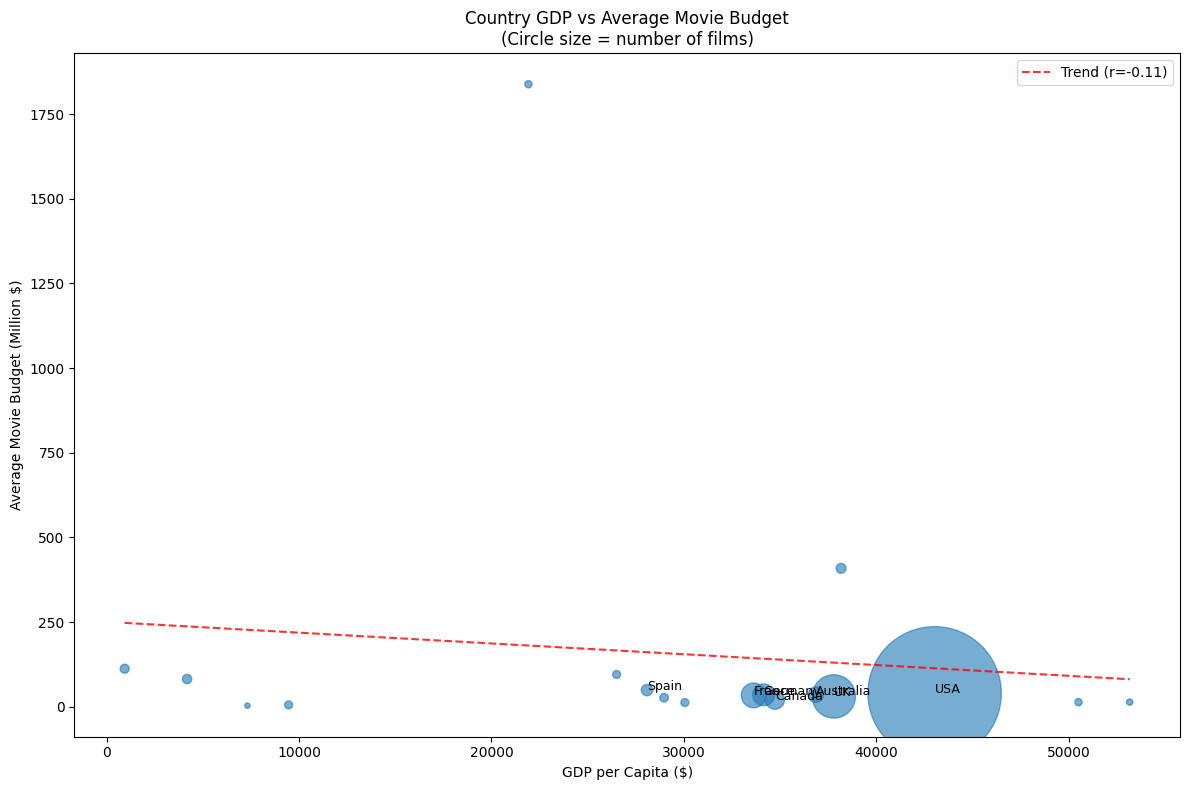

In [77]:
# Visualization for H4
plt.figure(figsize=(12, 8))

plt.scatter(country_stats['gdp_per_capita'], country_stats['budget']/1e6,
            s=country_stats['film_count']*3, alpha=0.6)

# Add country labels for major countries
for idx, row in country_stats.iterrows():
    if row['film_count'] > 20:
        plt.annotate(idx, (row['gdp_per_capita'], row['budget']/1e6), fontsize=9)

# Trend line
z = np.polyfit(country_stats['gdp_per_capita'], country_stats['budget']/1e6, 1)
p = np.poly1d(z)
x_line = np.linspace(country_stats['gdp_per_capita'].min(), country_stats['gdp_per_capita'].max(), 100)
plt.plot(x_line, p(x_line), 'r--', alpha=0.8, label=f'Trend (r={corr:.2f})')

plt.xlabel('GDP per Capita ($)')
plt.ylabel('Average Movie Budget (Million $)')
plt.title('Country GDP vs Average Movie Budget\n(Circle size = number of films)')
plt.legend()
plt.tight_layout()
plt.show()

## DATA

1. IMDB 5000 Movie Dataset - Kaggle: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset
2. World Development Indicators - World Bank: https://databank.worldbank.org/source/world-development-indicators